1. yfinance is a popular python library use for downlording historical market data from yahoo finance
2. It simplifay the process of accessing financial data for various secrities, including stocks ,commodities, cryptocurrencies,and more

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
# This code fatches historical price data for Bitcoin,Ethereum,Tether,and Binance coin for the past 5 yearsand keep only the close and volume column for each of these cryptocurrencies
# This cleared data can then be used for further analysisor machine learning task,such as predecting future prices
btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period = '5y')
prices1.drop(columns=['Open','High','Low','Dividends','Stock Splits'],axis=1 , inplace= True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period = '5y')
prices2.drop(columns=['Open','High','Low','Dividends','Stock Splits'],axis=1 , inplace= True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period = '5y')
prices3.drop(columns=['Open','High','Low','Dividends','Stock Splits'],axis=1 , inplace= True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period = '5y')
prices4.drop(columns=['Open','High','Low','Dividends','Stock Splits'],axis=1 , inplace= True)


In [3]:
# the parameter lsuffix and rsuffix in the join method are used to add suffixes to overlapping column names when joining two Dataframes
# This is necesary to avoid coiumn name conflict when the two Dataframe have column with the same name
p1 = prices1.join(prices2,lsuffix='(BTC)',rsuffix='(ETH)')
p2 = prices3.join(prices4,lsuffix='(USDT)',rsuffix='(BNB)')
data = p1.join(p2,lsuffix=' _',rsuffix='_')

In [4]:
data.head()

,Close(BTC),Volume(BTC),Close(ETH),Volume(ETH),Close(USDT),Volume(USDT),Close(BNB),Volume(BNB)
Date,,,,,,,,
2020-10-16 00:00:00+00:00,11322.123047,25635480772,366.229004,14670784817,1.001047,42355198410,29.994900,546849696
2020-10-17 00:00:00+00:00,11358.101562,19130430174,368.855927,10951115359,1.000697,31063236700,30.248236,377026508
2020-10-18 00:00:00+00:00,11483.359375,18283314340,378.213684,11047103109,1.000784,29893695719,30.659523,440840685
2020-10-19 00:00:00+00:00,11742.037109,23860769928,379.935608,12811242092,1.000853,35567986142,29.925068,385913101
2020-10-20 00:00:00+00:00,11916.334961,30915821592,369.136902,13741586582,1.000985,43872844120,28.803444,493774162


In [5]:
data.tail()

,Close(BTC),Volume(BTC),Close(ETH),Volume(ETH),Close(USDT),Volume(USDT),Close(BNB),Volume(BNB)
Date,,,,,,,,
2025-10-12 00:00:00+00:00,115169.765625,93710414091,4164.427734,61216174681,1.001257,217858899877,1303.117310,10201040572
2025-10-13 00:00:00+00:00,115271.078125,71582026739,4245.467773,50253782420,1.001014,193528248672,1293.473267,11820387271
2025-10-14 00:00:00+00:00,113118.664062,92212917403,4125.412109,67094148347,1.000547,221236832633,1211.051147,10106588255
2025-10-15 00:00:00+00:00,110783.164062,72574132855,3987.459473,50462889453,1.000587,170147938778,1162.691772,5853929585
2025-10-16 00:00:00+00:00,111572.695312,73527574528,4059.556641,45142671360,1.000499,166939377664,1181.255127,5450651648


In [6]:
data.shape

(1827, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2020-10-16 00:00:00+00:00 to 2025-10-16 00:00:00+00:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close(BTC)    1827 non-null   float64
 1   Volume(BTC)   1827 non-null   int64  
 2   Close(ETH)    1827 non-null   float64
 3   Volume(ETH)   1827 non-null   int64  
 4   Close(USDT)   1827 non-null   float64
 5   Volume(USDT)  1827 non-null   int64  
 6   Close(BNB)    1827 non-null   float64
 7   Volume(BNB)   1827 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.5 KB


In [8]:
data.isnull().sum()

Close(BTC)      0
Volume(BTC)     0
Close(ETH)      0
Volume(ETH)     0
Close(USDT)     0
Volume(USDT)    0
Close(BNB)      0
Volume(BNB)     0
dtype: int64

In [9]:
data.describe()

,Close(BTC),Volume(BTC),Close(ETH),Volume(ETH),Close(USDT),Volume(USDT),Close(BNB),Volume(BNB)
count,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03
mean,51162.582582,3.619974e+10,2419.360429,1.895429e+10,1.000174,6.867821e+10,418.998071,1.744607e+09
std,28956.841107,2.209758e+10,979.649941,1.255333e+10,0.000716,4.361959e+10,212.072708,1.470011e+09
min,11322.123047,5.331173e+09,366.229004,2.081626e+09,0.995872,9.989859e+09,26.857050,2.038465e+08
25%,27698.311523,2.137903e+10,1677.531128,1.025234e+10,0.999923,3.952366e+10,271.901550,7.541223e+08
50%,43154.945312,3.139706e+10,2316.579102,1.604095e+10,1.000157,5.845254e+10,367.772491,1.521708e+09
75%,65409.552734,4.532808e+10,3166.050659,2.358543e+10,1.000421,8.434589e+10,585.939362,2.115722e+09
max,124752.531250,3.509679e+11,4831.348633,9.773662e+10,1.011530,3.443980e+11,1310.214355,1.798295e+10


Explorateory Data Analysis

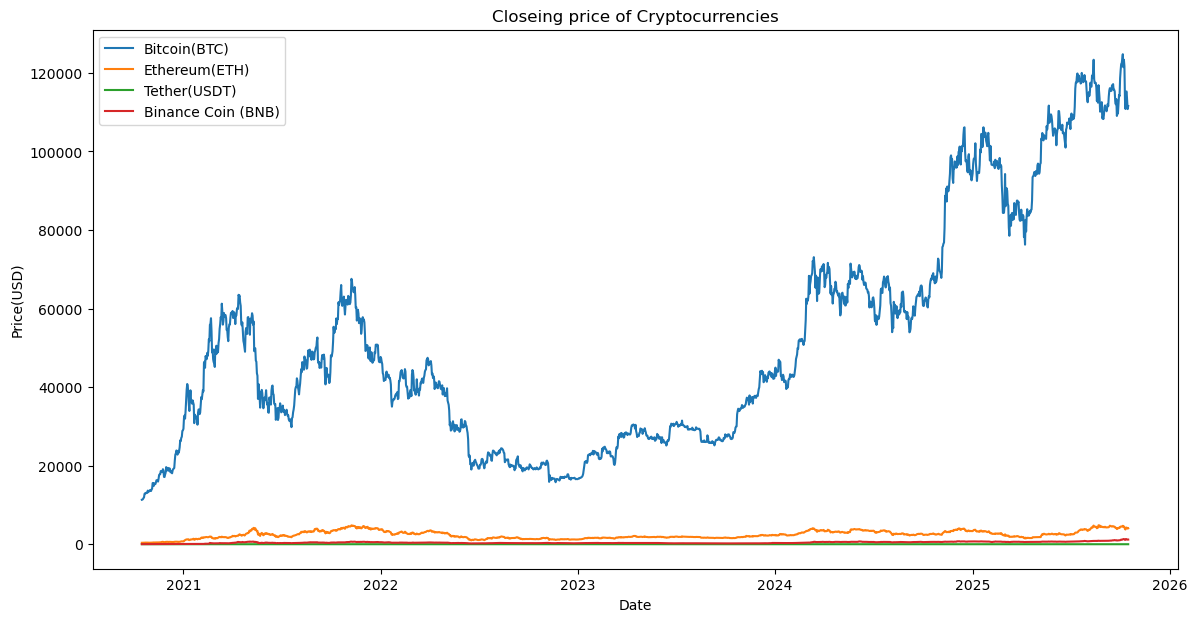

In [10]:
# visualise the closing prices
# creating a line plot for visualize the closing price of all four criypto currencies over time
plt.figure(figsize=(14,7))
plt.plot(data.index,data['Close(BTC)'], label = 'Bitcoin(BTC)')
plt.plot(data.index,data['Close(ETH)'],label = 'Ethereum(ETH)')
plt.plot(data.index, data['Close(USDT)'],label = 'Tether(USDT)')
plt.plot(data.index,data['Close(BNB)'],label = 'Binance Coin (BNB)')
plt.title('Closeing price of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

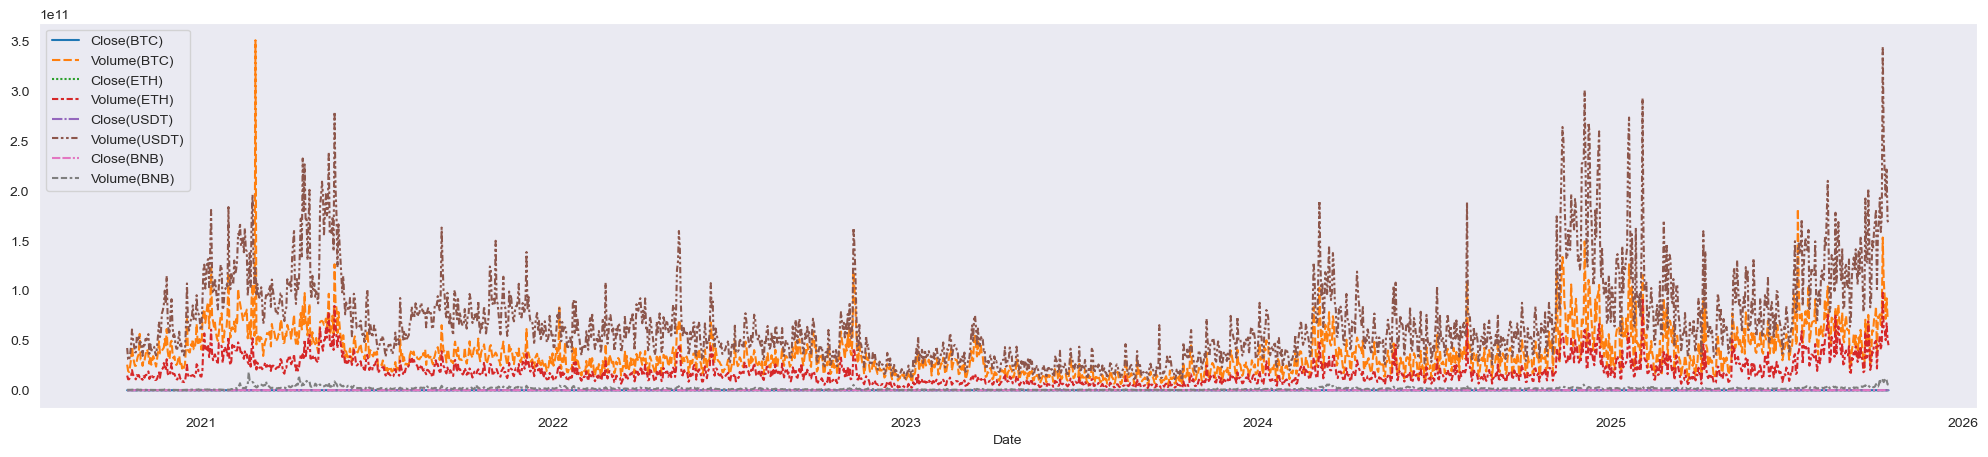

In [11]:
plt.figure(figsize=(25,5))
sns.set_style('dark')
sns.lineplot(data=data)


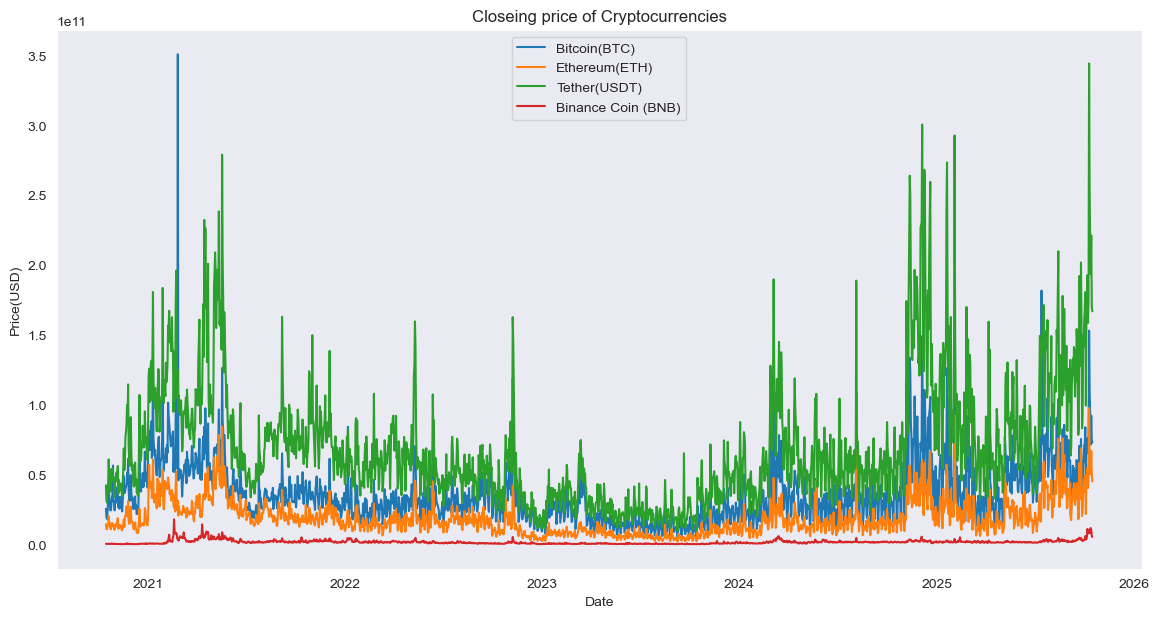

In [12]:
# visualize the trading volumes
# lets visualize the treading volume of all four cryptocurrencies

plt.figure(figsize=(14,7))
plt.plot(data.index,data['Volume(BTC)'], label = 'Bitcoin(BTC)')
plt.plot(data.index,data['Volume(ETH)'],label = 'Ethereum(ETH)')
plt.plot(data.index, data['Volume(USDT)'],label = 'Tether(USDT)')
plt.plot(data.index,data['Volume(BNB)'],label = 'Binance Coin (BNB)')
plt.title('Closeing price of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.legend()
plt.show()

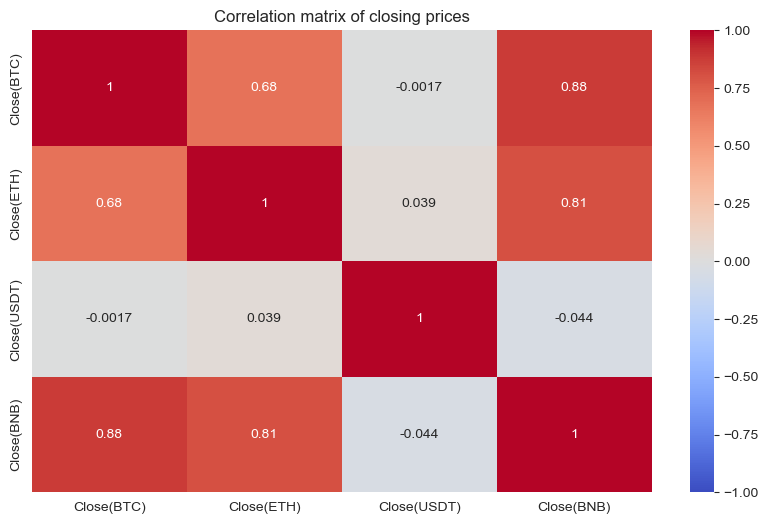

In [15]:
# Correlation analysis
# we will analyze the correlation between the closing prices of the cryptocurrencies
# calculate the correlation matrix

corr_matrix = data[['Close(BTC)', 'Close(ETH)', 'Close(USDT)', 'Close(BNB)']].corr()

# plot the heat map
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix of closing prices')
plt.show()

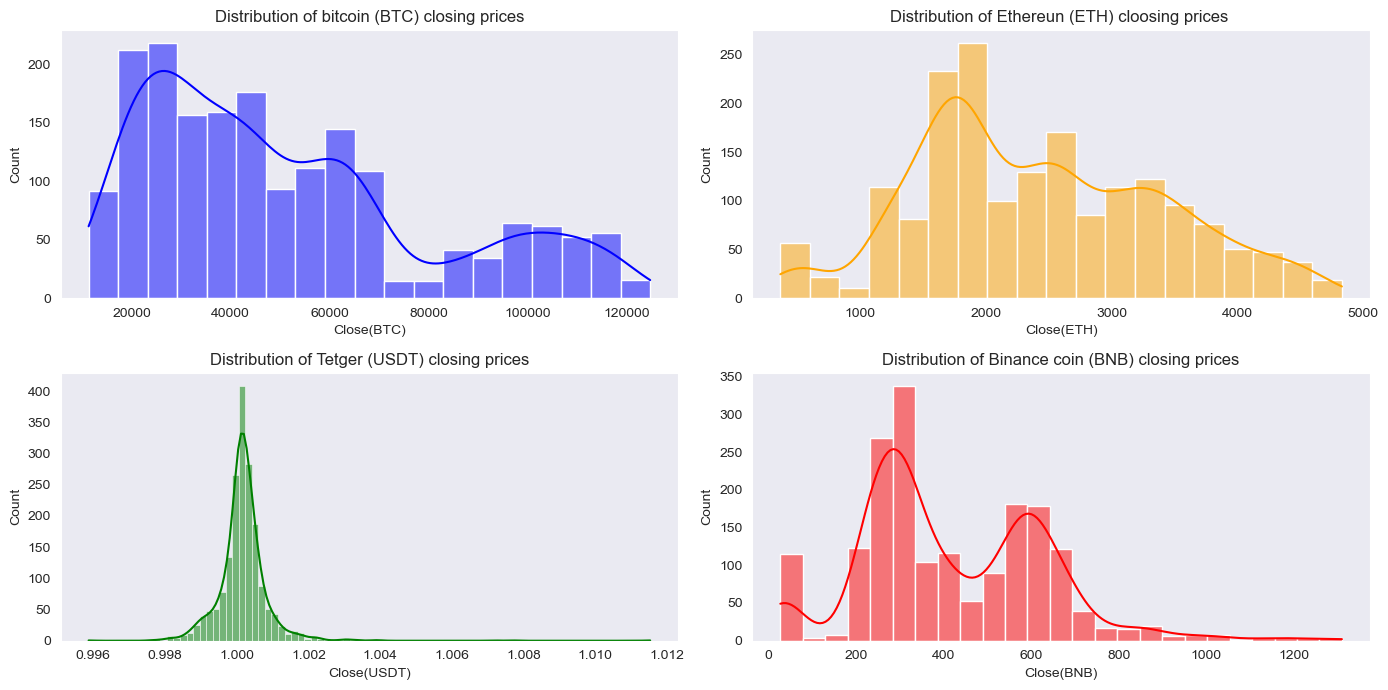

In [17]:
# Distribution of closing prices
# Lets plot the distribution of closing prices for each cryptocurrency
plt.figure(figsize=(14,7))

plt.subplot(2,2,1)
sns.histplot(data['Close(BTC)'],kde= True,color='blue')
plt.title('Distribution of bitcoin (BTC) closing prices')

plt.subplot(2,2,2)
sns.histplot(data['Close(ETH)'],kde=True,color='orange')
plt.title('Distribution of Ethereun (ETH) cloosing prices ')
plt.subplot(2,2,3)
sns.histplot(data['Close(USDT)'],kde = True,color='green')
plt.title('Distribution of Tetger (USDT) closing prices')

plt.subplot(2,2,4)
sns.histplot(data['Close(BNB)'],kde = True, color='red')
plt.title('Distribution of Binance coin (BNB) closing prices')

plt.tight_layout()
plt.show()

nrows → number of rows of subplots

ncols → number of columns of subplots

index → position of the current subplot (starting from 1)

array([[<Axes: title={'center': 'Close(BTC)'}>,
        <Axes: title={'center': 'Volume(BTC)'}>,
        <Axes: title={'center': 'Close(ETH)'}>,
        <Axes: title={'center': 'Volume(ETH)'}>],
       [<Axes: title={'center': 'Close(USDT)'}>,
        <Axes: title={'center': 'Volume(USDT)'}>,
        <Axes: title={'center': 'Close(BNB)'}>,
        <Axes: title={'center': 'Volume(BNB)'}>]], dtype=object)

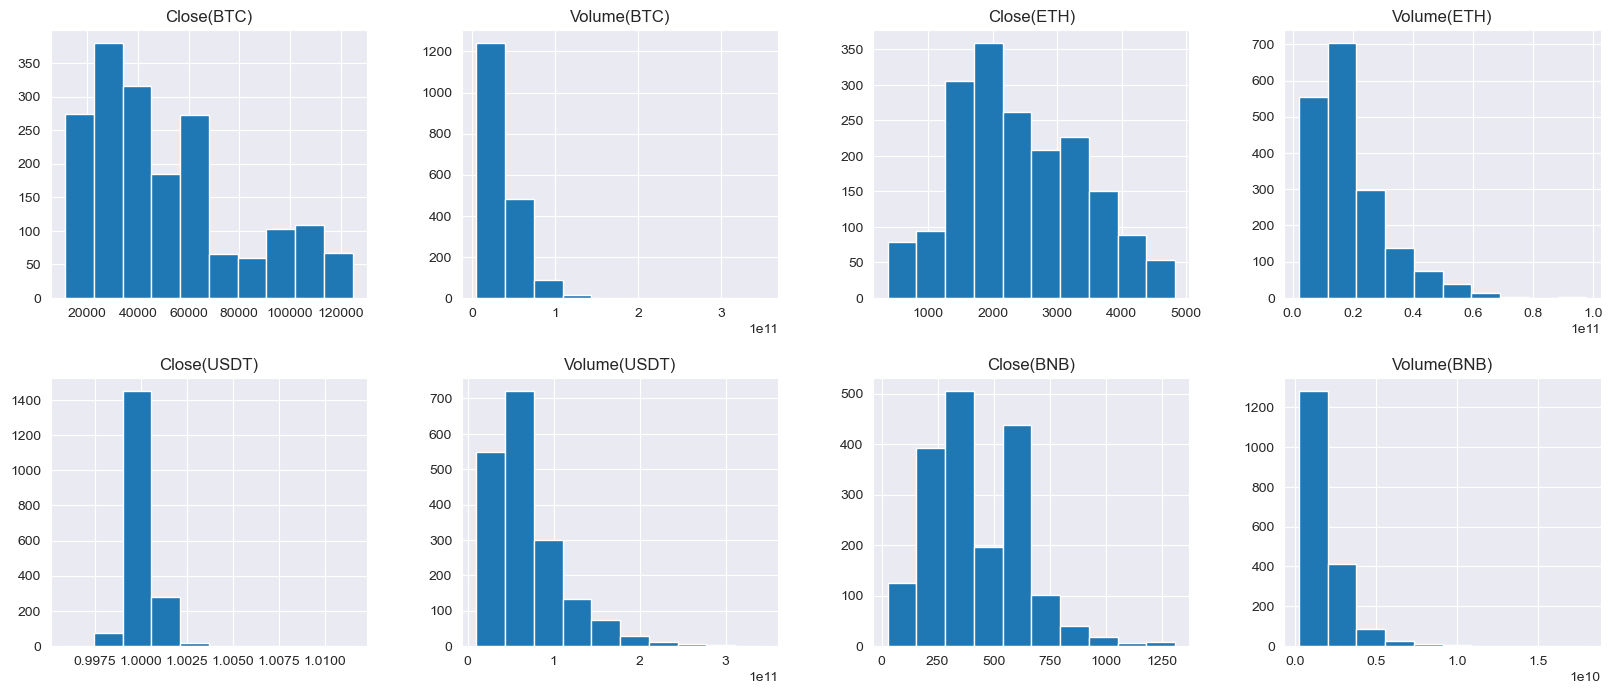

In [18]:
data.hist(figsize=(20,8),layout=(2,4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

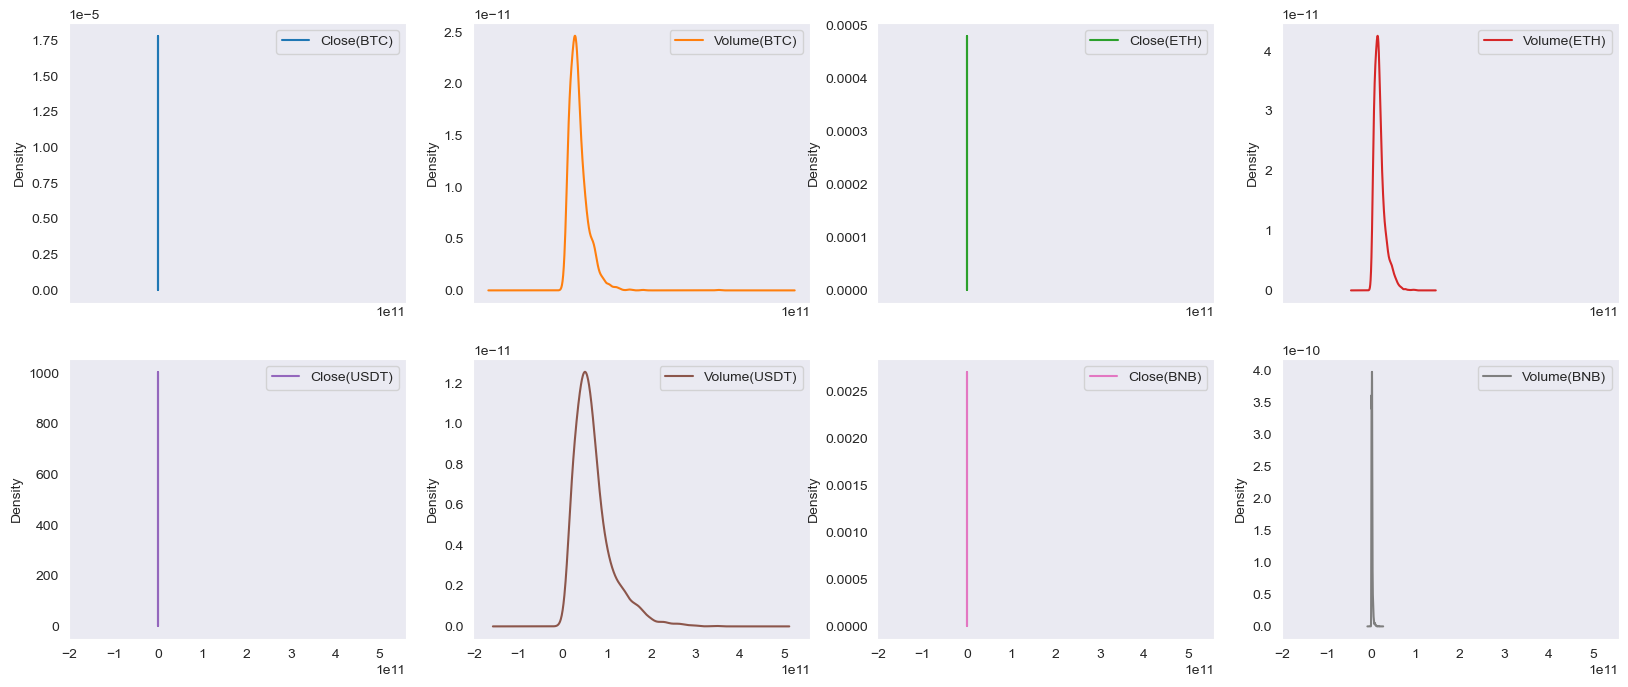

In [19]:
data.plot(kind= 'kde',subplots=True,layout=(2,4),figsize=(20,8))

<Axes: ylabel='Density'>

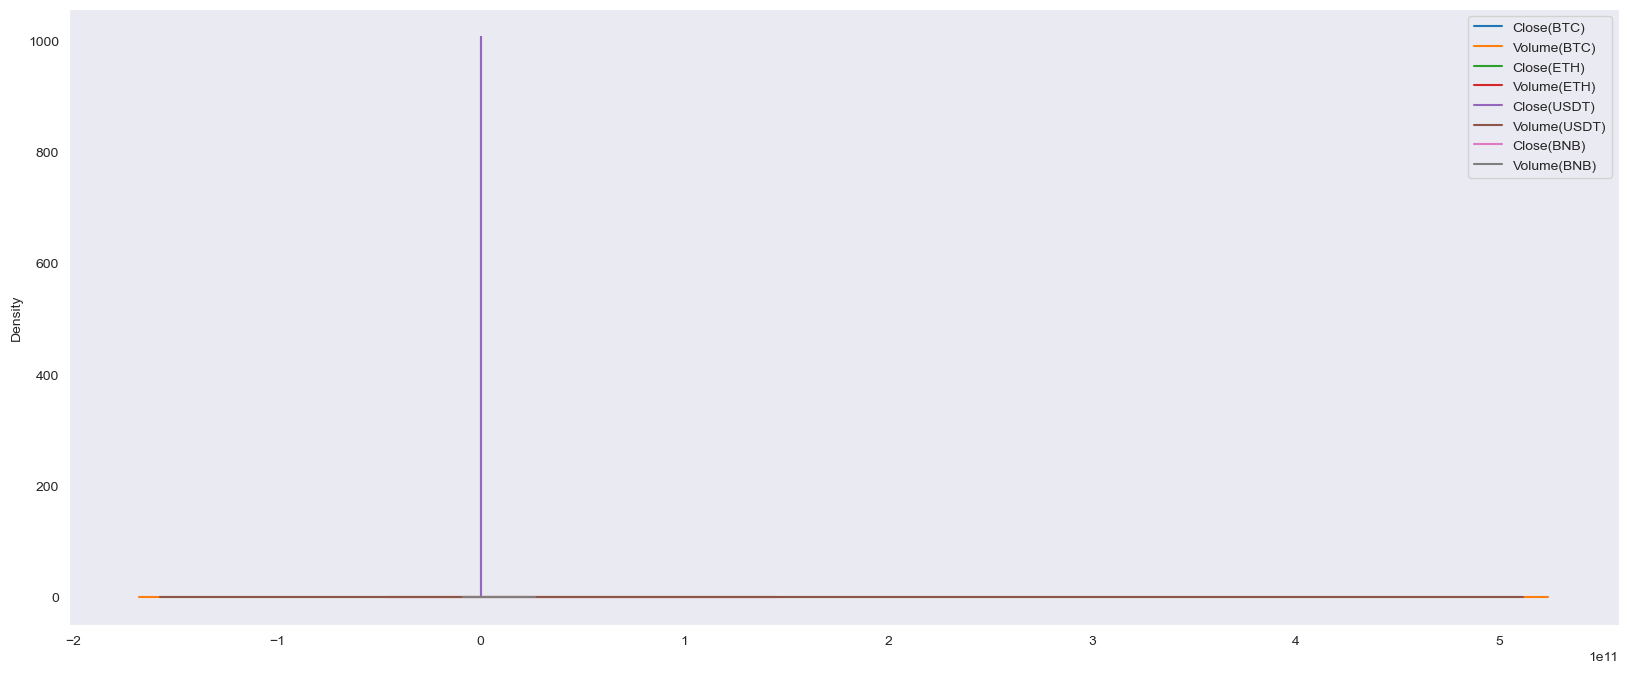

In [20]:
data.plot(kind= 'kde',subplots=False,layout=(2,4),figsize=(20,8))

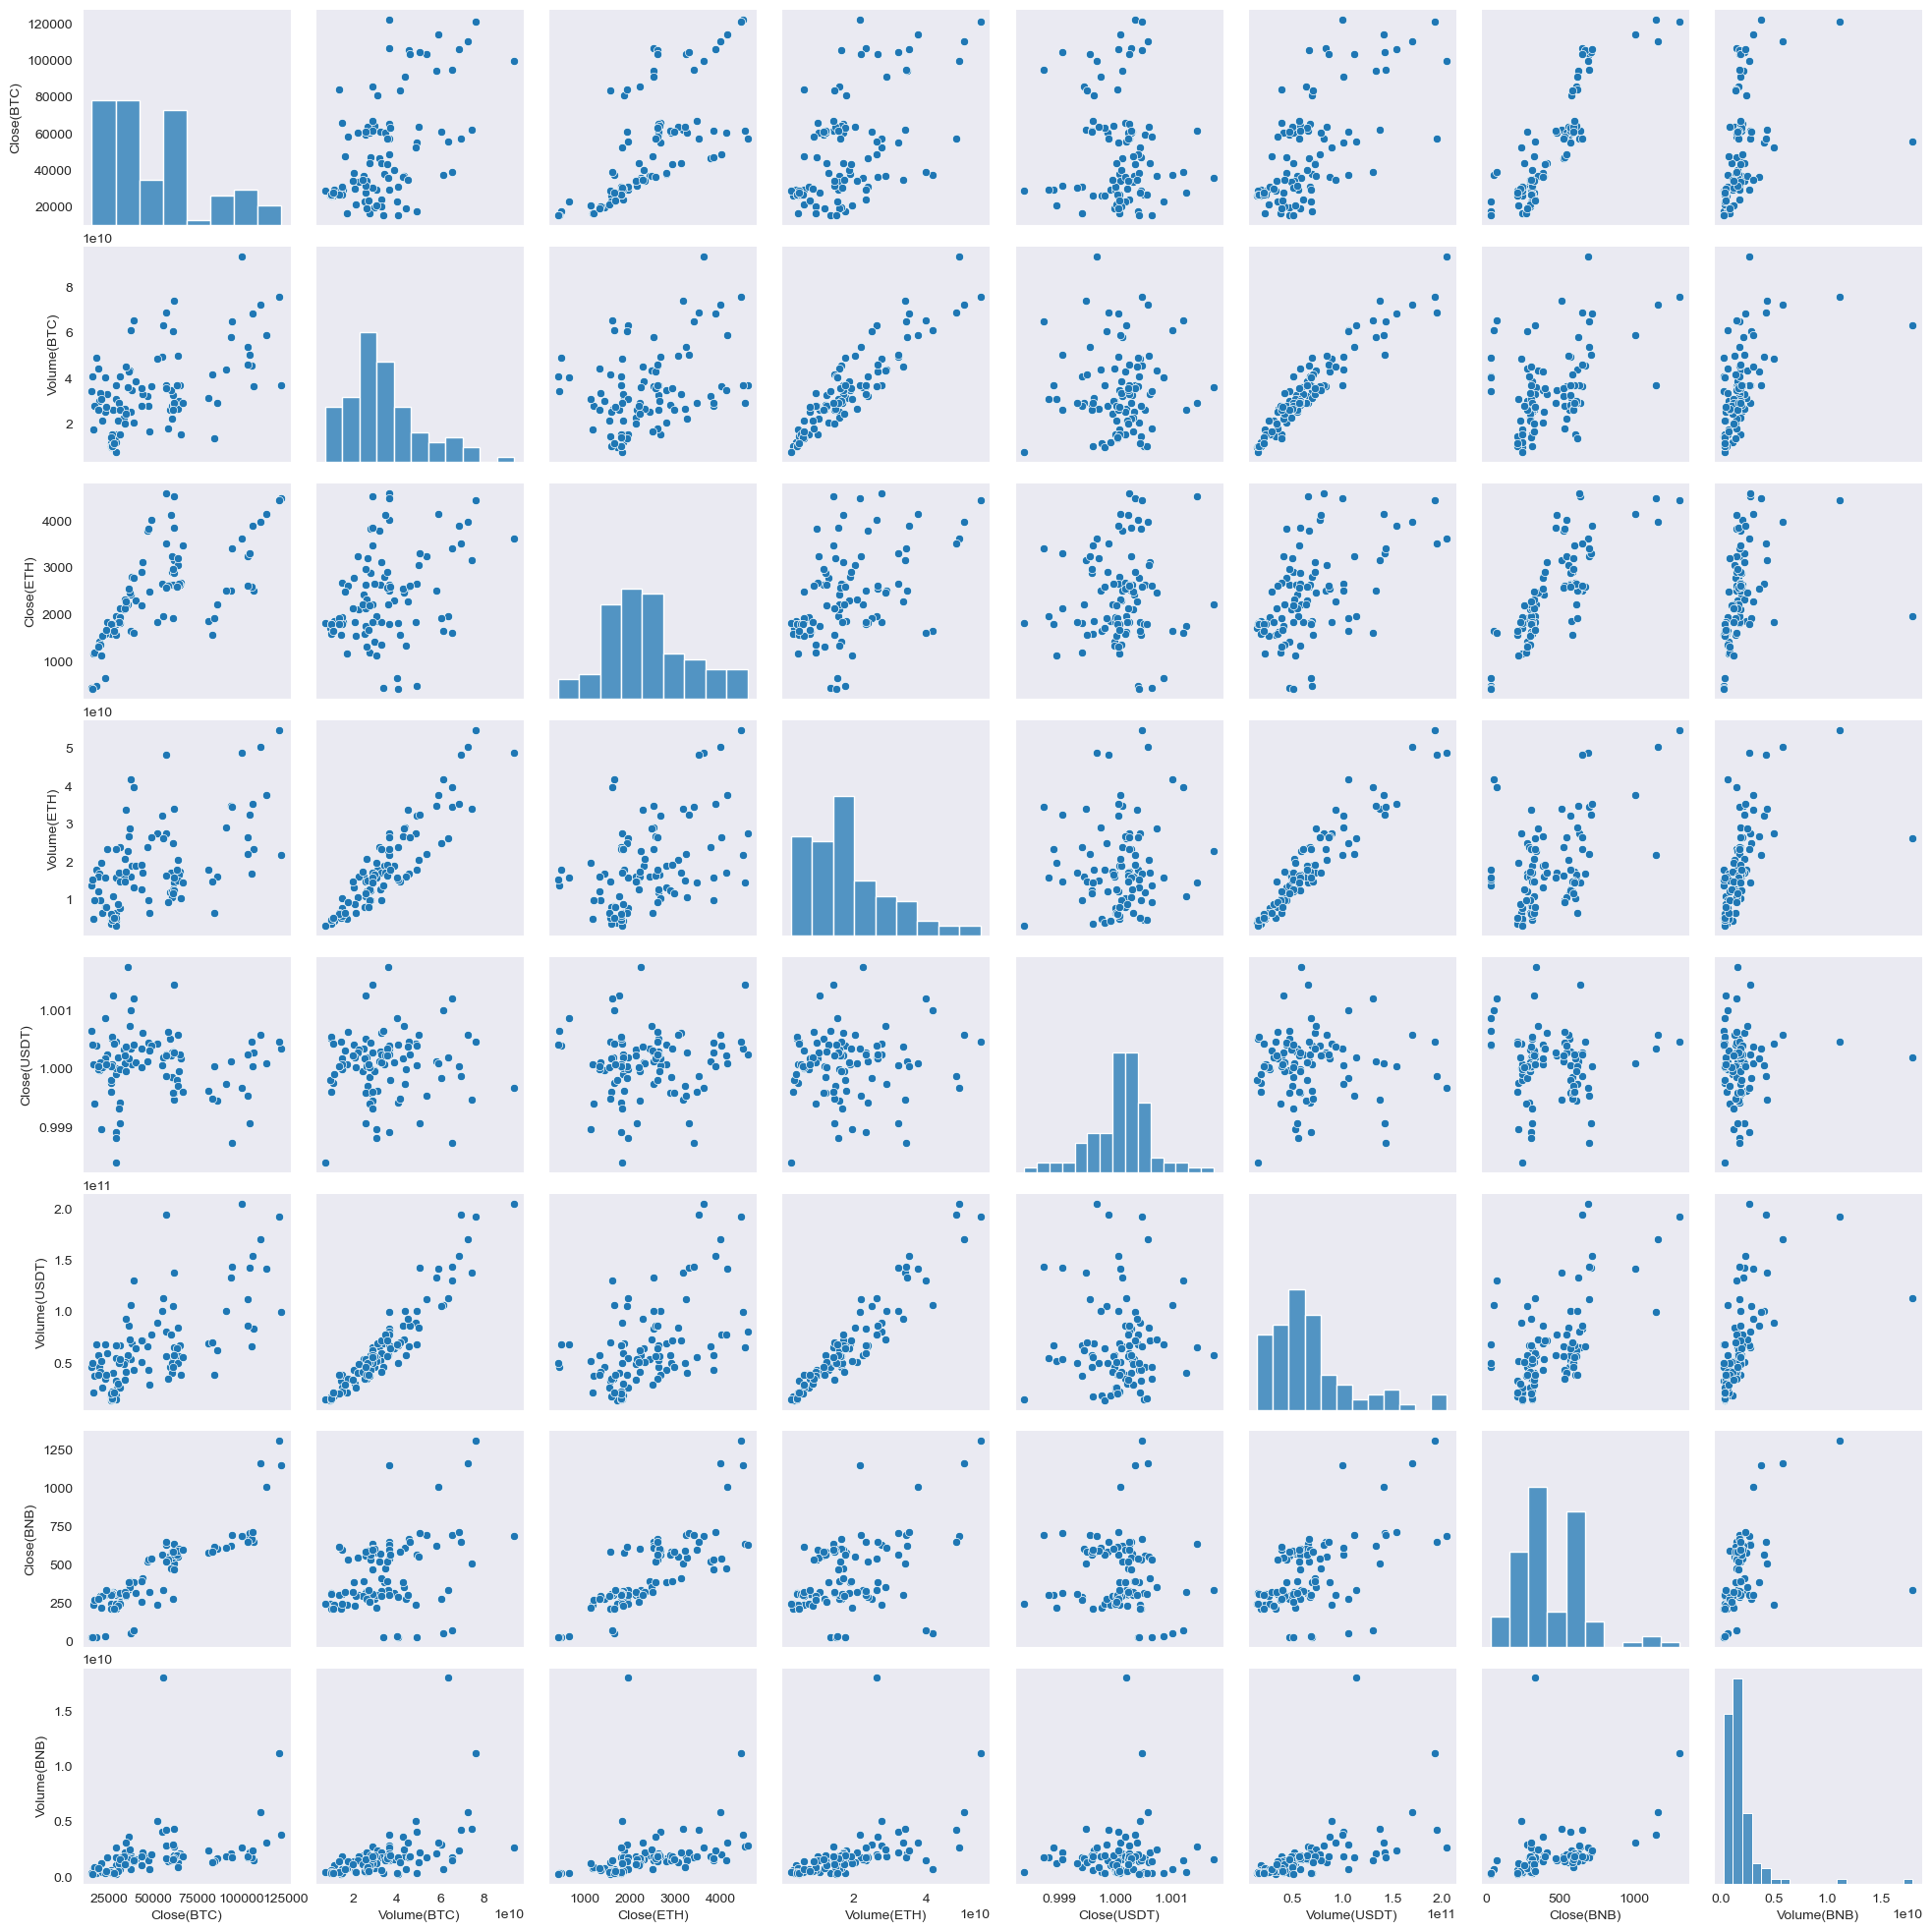

In [21]:
sns.pairplot(data.sample(n = 100))

Data preprocessing

In [23]:
x = data.drop(columns=['Close(BTC)'],axis = 1)
y = data.loc[:,'Close(BTC)']

In [24]:
x.head()

,Volume(BTC),Close(ETH),Volume(ETH),Close(USDT),Volume(USDT),Close(BNB),Volume(BNB)
Date,,,,,,,
2020-10-16 00:00:00+00:00,25635480772,366.229004,14670784817,1.001047,42355198410,29.994900,546849696
2020-10-17 00:00:00+00:00,19130430174,368.855927,10951115359,1.000697,31063236700,30.248236,377026508
2020-10-18 00:00:00+00:00,18283314340,378.213684,11047103109,1.000784,29893695719,30.659523,440840685
2020-10-19 00:00:00+00:00,23860769928,379.935608,12811242092,1.000853,35567986142,29.925068,385913101
2020-10-20 00:00:00+00:00,30915821592,369.136902,13741586582,1.000985,43872844120,28.803444,493774162


In [25]:
y.head()

Date
2020-10-16 00:00:00+00:00    11322.123047
2020-10-17 00:00:00+00:00    11358.101562
2020-10-18 00:00:00+00:00    11483.359375
2020-10-19 00:00:00+00:00    11742.037109
2020-10-20 00:00:00+00:00    11916.334961
Name: Close(BTC), dtype: float64

In [26]:
# split the data into traning and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
# print the shape of the resulting datasets
print(f'x_train shape : {x_train.shape}')
print(f'x_test shape : {x_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

x_train shape : (1461, 7)
x_test shape : (366, 7)
y_train shape : (1461,)
y_test shape : (366,)


In [28]:
# select KBest
# select Kbest is a feature selection method provided by sklearn that select the top k features based on specified scoring function
# This function evalutes each features independenty and select those that have the storngest reltionship with the target variable

# parameters
# k: specifies the number of top feature to select. in your case ,k = 4 indicates that you wants to select the top 4 features

from sklearn.feature_selection import SelectKBest
fs = SelectKBest(k = 4)
x_train = fs.fit_transform(x_train,y_train)
x_test = fs.transform(x_test)

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [29]:
mask = fs.get_support()
selected_feature = x.columns[mask]
print('selected feature :' , selected_feature)


selected feature : Index(['Close(USDT)', 'Volume(USDT)', 'Close(BNB)', 'Volume(BNB)'], dtype='object')


In [30]:
x_train

array([[9.99899983e-01, 4.06890216e+10, 3.08811157e+02, 1.23175980e+09],
       [1.00053298e+00, 8.79833576e+10, 3.54329346e+02, 3.86569184e+09],
       [9.99279976e-01, 4.31985381e+10, 2.28953751e+02, 1.14854118e+09],
       ...,
       [1.00033605e+00, 5.05567868e+10, 6.07704102e+02, 1.50750925e+09],
       [1.00019097e+00, 6.83920864e+10, 4.06718201e+02, 2.11638117e+09],
       [1.00001597e+00, 4.84059347e+10, 2.79238098e+02, 9.52486877e+08]],
      shape=(1461, 4))

In [31]:
x_test

array([[1.00031495e+00, 7.43369703e+10, 3.71954376e+02, 2.15047583e+09],
       [1.00051498e+00, 5.94264778e+10, 4.02450043e+02, 1.64401320e+09],
       [1.00026596e+00, 5.77722593e+10, 2.92531372e+02, 1.95762334e+09],
       ...,
       [9.99421000e-01, 3.68416956e+10, 3.00427826e+02, 1.21917780e+09],
       [9.99992013e-01, 3.30486165e+10, 2.70971008e+02, 5.46926291e+08],
       [9.99975979e-01, 3.87416652e+10, 3.02227295e+02, 8.16347256e+08]],
      shape=(366, 4))

In [32]:
# minmaxscaler  is a prerocessing method in sklearn that transform feature by scaling them to a specified range
# Its often used when your data need to be normalized eithin a specific range to ensure all feature contributed easily to the analysis

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
# implimentation of 10 different algorithem using sklearn. Each algorithem is trained and evaluted a sample dataset
# import libraries

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,r2_score

----- Linear Regression -----
Mean Squared Error (MSE): 149533470.91824004
R-squared: 0.8262731202232396

----- Ridge Regression -----
Mean Squared Error (MSE): 154625727.89812657
R-squared: 0.8203569737531239

----- Lasso Regression -----
Mean Squared Error (MSE): 149656374.3826163
R-squared: 0.8261303318879678

----- ElasticNet Regression -----
Mean Squared Error (MSE): 775556870.1291304
R-squared: 0.09896376838177834

----- Support Vector Regression (SVR) -----
Mean Squared Error (MSE): 898925760.6953769
R-squared: -0.04436529559288971

----- Decision Tree Regression -----
Mean Squared Error (MSE): 89970075.69971034
R-squared: 0.8954734319439713

----- Support Vector Regression (SVR) -----
Mean Squared Error (MSE): 898925760.6953769
R-squared: -0.04436529559288971

----- Decision Tree Regression -----
Mean Squared Error (MSE): 89970075.69971034
R-squared: 0.8954734319439713

----- Random Forest Regression -----
Mean Squared Error (MSE): 51452918.40902751
R-squared: 0.940222380208802

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


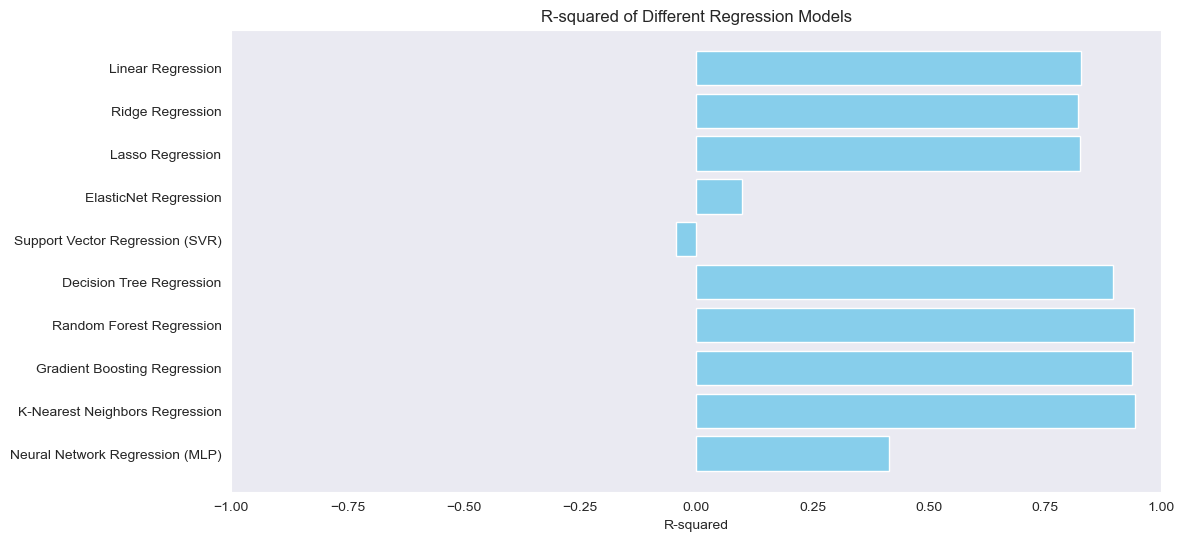

In [36]:

#Define Models and Perform Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Neural Network Regression (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

# Train and evaluate each model
results = {'Model': [], 'MSE': [], 'R-squared': []}

for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Predict on test set
    y_pred = model.predict(x_test)

    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    # Print results
    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print()

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()


Random Forest Regression is a powerful and versatile algorithm suitable for various regression tasks, offering robust performance and the ability to handle complex data relationships

save the model

In [40]:
import pickle
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
X, Y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=0)


# Scale the features (optional but recommended for some algorithms)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model_rf.fit(x_train, x_train)

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

# Save scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the loaded model
Y_pred = loaded_model.predict(x_test)

# Evaluate the loaded model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Loaded Random Forest Regression - Mean Squared Error (MSE): {mse}")
print(f"Loaded Random Forest Regression - R-squared: {r2}")


Loaded Random Forest Regression - Mean Squared Error (MSE): 503305197.8560074
Loaded Random Forest Regression - R-squared: 0.4152637462233645
